# K-Means Clustering

## Imports

In [88]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generating Fake Data

In [89]:
from sklearn.datasets import make_blobs

np.random.seed(0) # No Change When Reinvoking The Program
x, y = make_blobs(n_samples=5000, n_features=4, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

print(x[0:5])
print(y[0:5]) # Center Index (0, 1, 2 or 3)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 [-1.44019058 -1.36678252]
 [ 4.90119792  4.53749125]]
[1 2 2 1 0]


## Plotting Generated Data

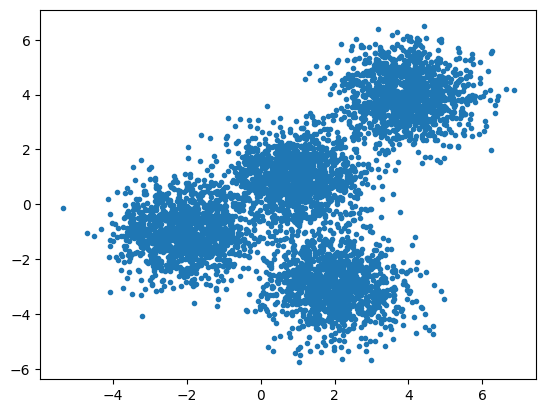

In [90]:
plt.scatter(x[:, 0], x[:, 1], marker=".")

## Setting Up K-Means
#### Init Parameters: 1-"k-means++", 2-"random"

In [91]:
from sklearn.cluster import KMeans

K = 4
k_means = KMeans(init="k-means++", n_clusters=K, n_init=12)
k_means.fit(x)

print(f"K-Means Labels: {k_means.labels_}")
print(f"K-Means Cluster Centers: {k_means.cluster_centers_}")

K-Means Labels: [0 3 3 ... 1 0 0]
K-Means Cluster Centers: [[-2.03743147 -0.99782524]
 [ 3.97334234  3.98758687]
 [ 0.96900523  0.98370298]
 [ 1.99741008 -3.01666822]]


## Plot

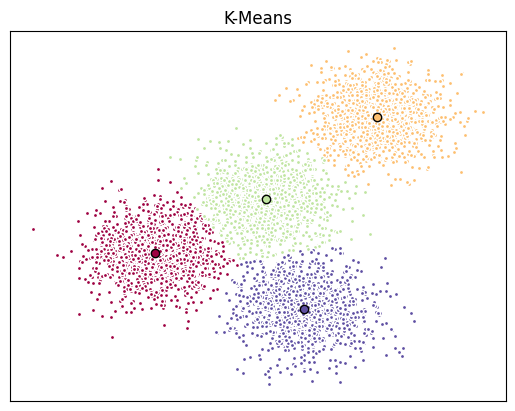

In [92]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))

for k, color in zip(range(K), colors):
    my_members = k_means.labels_ == k
    cluster_centers = k_means.cluster_centers_[k]
    ax.plot(x[my_members, 0], x[my_members, 1], "w", markerfacecolor=color, marker=".")
    ax.plot(cluster_centers[0], cluster_centers[1], "o", markerfacecolor=color, markeredgecolor="k", markersize=6)

ax.set_title("K-Means")
ax.set_xticks(())   # Remove X Axis Ticks
ax.set_yticks(())
plt.show()